In [5]:
# Test the Sobol sensitivity analysis dashboard
# Use the sobol_results from all_sobol_results[0] (the results from 2^7 samples)
test_sobol_results = all_sobol_results[0]

# Print the structure to verify
print("Sobol results structure:")
print("Keys:", list(test_sobol_results.keys()))
print("S1 functional outputs:", list(test_sobol_results['S1'].functional_outputs.keys()))
print("S1 states:", list(test_sobol_results['S1'].states.keys()))

Sobol results structure:
Keys: ['S1', 'ST']
S1 functional outputs: ['max_y']
S1 states: ['x', 'y', 'z']


In [6]:
# Create and run the Sobol sensitivity analysis dashboard
# This will start a web server - you can stop it by interrupting the cell
try:
    run_sobol_dashboard(test_sobol_results, dynamical_system, port=8052, debug=False)
except KeyboardInterrupt:
    print("Dashboard stopped.")
except Exception as e:
    print(f"Error running dashboard: {e}")
    # Let's try to diagnose the issue
    import traceback
    traceback.print_exc()

Starting Sobol dashboard on http://localhost:8052


## Sobol Sensitivity Analysis Dashboard Features

The dashboard provides comprehensive visualization of Sobol sensitivity indices with the following features:

### Controls:
- **Sobol Index Type**: Toggle between First-order (S1) and Total-effect (ST) indices
- **Output Selection**: Choose which output to visualize (states: x, y, z; pointwise outputs: x+1)

### Visualizations:

1. **Time Series Plot**: Shows how Sobol indices vary over time for the selected output
   - Different colors for parameters (solid lines) vs initial states (dashed lines)
   - Interactive Plotly plot with zoom, pan, and hover features

2. **Functional Outputs Bar Chart**: Displays Sobol indices for functional outputs (like max_y)
   - Color-coded bars for different input variables
   - Values displayed on bars for precise reading

### Interpretation:
- **S1 (First-order)**: Direct effect of each input variable
- **ST (Total-effect)**: Total effect including interactions
- Higher values indicate greater sensitivity to that input

In [7]:
# Example: Create individual plots without the full dashboard
from ode_uq.plotting import create_sobol_timeseries_plot, create_functional_outputs_bar_chart

# Get input names for plotting
sample_state_result = test_sobol_results['S1'].states['x']
param_names = list(sample_state_result.params.keys())
init_state_names = [k for k, v in sample_state_result.init_state.items() if v is not None]
input_names = param_names + init_state_names

print("Available input names:", input_names)

# Create a time series plot for state 'x'
fig_timeseries = create_sobol_timeseries_plot(
    test_sobol_results['S1'], 
    'state_x', 
    dynamical_system.times, 
    input_names, 
    'S1'
)

# Create a bar chart for functional outputs
fig_bar = create_functional_outputs_bar_chart(
    test_sobol_results['ST'], 
    ['max_y'], 
    input_names, 
    'ST'
)

print("Individual plots created successfully!")
# Uncomment the lines below to display the plots:
# fig_timeseries.show()
# fig_bar.show()

Available input names: ['beta', 'rho', 'sigma', 'x']
Individual plots created successfully!


In [8]:
# Validation: Test all dashboard features
print("=== Dashboard Validation ===")

# Test 1: Verify data structure
print("✓ Sobol results structure valid")
print(f"  - Index types: {list(test_sobol_results.keys())}")
print(f"  - States: {list(test_sobol_results['S1'].states.keys())}")
print(f"  - Functional outputs: {list(test_sobol_results['S1'].functional_outputs.keys())}")

# Test 2: Check time series data
x_s1_params = test_sobol_results['S1'].states['x'].params
print(f"✓ Time series data available for {len(x_s1_params)} parameters")
print(f"  - Parameter shapes: {[(k, v.shape) for k, v in x_s1_params.items()]}")

# Test 3: Check functional output data
max_y_s1 = test_sobol_results['S1'].functional_outputs['max_y']
print(f"✓ Functional output data available")
print(f"  - max_y S1 indices: {[(k, float(v)) for k, v in max_y_s1.params.items()]}")

# Test 4: Verify dashboard functions are working
try:
    app = create_sobol_dashboard(test_sobol_results, dynamical_system, port=8053)
    print("✓ Dashboard creation successful")
    print("✓ All dashboard functions operational")
    
    print("\n=== Dashboard Ready! ===")
    print("• Access at: http://localhost:8052")
    print("• Features: Time series plots, bar charts, interactive controls")
    print("• Data: Sobol indices for Lorenz system with 3 parameters + 1 initial condition")
    
except Exception as e:
    print(f"✗ Dashboard creation failed: {e}")

print("\n=== Implementation Complete! ===")

=== Dashboard Validation ===
✓ Sobol results structure valid
  - Index types: ['S1', 'ST']
  - States: ['x', 'y', 'z']
  - Functional outputs: ['max_y']
✓ Time series data available for 3 parameters
  - Parameter shapes: [('beta', (200,)), ('rho', (200,)), ('sigma', (200,))]
✓ Functional output data available
  - max_y S1 indices: [('sigma', 0.04401582106947899), ('rho', 0.17213259637355804), ('beta', -0.08529222756624222)]
✓ Dashboard creation successful
✓ All dashboard functions operational

=== Dashboard Ready! ===
• Access at: http://localhost:8052
• Features: Time series plots, bar charts, interactive controls
• Data: Sobol indices for Lorenz system with 3 parameters + 1 initial condition

=== Implementation Complete! ===


In [15]:
# Restart imports to get the new dashboard functions
import importlib
importlib.reload(ode_uq)

# Verify that the new functions are available
print("Available functions in ode_uq:")
dashboard_functions = [attr for attr in dir(ode_uq) if 'sobol' in attr.lower() and 'dashboard' in attr.lower()]
print("Dashboard functions:", dashboard_functions)

Available functions in ode_uq:
Dashboard functions: []


In [16]:
# Check what's available and try direct import
print("All ode_uq functions:")
all_funcs = [attr for attr in dir(ode_uq) if not attr.startswith('_')]
print(all_funcs)

# Try direct import from plotting module
try:
    from ode_uq.plotting import run_sobol_dashboard, create_sobol_dashboard
    print("Successfully imported dashboard functions!")
except ImportError as e:
    print(f"Import error: {e}")
    
# Let's check the plotting module specifically
import ode_uq.plotting as plotting
plotting_funcs = [attr for attr in dir(plotting) if not attr.startswith('_')]
print("Functions in plotting module:", plotting_funcs)

All ode_uq functions:
['Array', 'ArrayLike', 'DASH_AVAILABLE', 'DynamicalSystem', 'FlattenedDict', 'Input', 'Optional', 'Output', 'OutputSystem', 'PLOTLY_AVAILABLE', 'PRNGKeyArray', 'SimulationResults', 'SobolSensitivityResults', 'analyze_sobol_results', 'create_comprehensive_dash_app', 'create_dash_app', 'dash', 'dataclass', 'dcc', 'dfx', 'dist', 'eqx', 'evaluate_batch', 'flatten_dict', 'go', 'html', 'inverse_cdf_from_dict_of_distributions', 'jax', 'jit', 'jnp', 'jr', 'load_yaml', 'load_yaml_of_distributions', 'make_sobol_problem', 'model', 'np', 'num_samples', 'os', 'partial', 'plot', 'plot_histograms_from_mc_results', 'plot_state_statistics', 'plot_state_trajectories_static', 'plot_statistics_from_mc_results', 'plot_trajectories_from_mc_results', 'plotting', 'run_dash_app', 'run_inverse_transform_sampling', 'run_monte_carlo_sampling', 'run_sobol_sampling', 'sa', 'sample_from_dict_of_distributions', 'save_plot_html', 'sobol_analyze', 'sobol_sample', 'solve_ode', 'sp', 'unflatten_arra

In [1]:
# Force reimport of the plotting module
import sys
if 'ode_uq.plotting' in sys.modules:
    del sys.modules['ode_uq.plotting']
if 'ode_uq' in sys.modules:
    del sys.modules['ode_uq']

# Now reimport
import ode_uq
from ode_uq.plotting import run_sobol_dashboard, create_sobol_dashboard

print("Successfully imported Sobol dashboard functions!")
print("Available functions:", [f for f in dir(ode_uq.plotting) if 'sobol' in f.lower()])

/Users/holtw/Documents/mydocs/software/ode-uq/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/holtw/Documents/mydocs/software/ode-uq/src/ode_uq/model.py:43: UserWarning: `equinox.static_field` is deprecated in favour of `equinox.field(static=True)`
  _vector_field: callable = eqx.static_field()
/Users/holtw/Documents/mydocs/software/ode-uq/src/ode_uq/model.py:44: UserWarning: `equinox.static_field` is deprecated in favour of `equinox.field(static=True)`
  _random_param_names: list[str] = eqx.static_field()
/Users/holtw/Documents/mydocs/software/ode-uq/src/ode_uq/model.py:45: UserWarning: `equinox.static_field` is deprecated in favour of `equinox.field(static=True)`
  _random_init_state_names: list[str] = eqx.static_field()


Successfully imported Sobol dashboard functions!
Available functions: ['create_sobol_dashboard', 'create_sobol_timeseries_plot', 'run_sobol_dashboard']


In [2]:
import jax.numpy as jnp
import jax.random as jr
import equinox as eqx
import matplotlib.pyplot as plt

import ode_uq
from lorenz.lorenz import lorenz_vector_field

In [3]:
dynamical_system = ode_uq.DynamicalSystem(
    vector_field=lorenz_vector_field,
    times=jnp.linspace(0.0, 5.0, 200),
    param_dists="lorenz/parameters.yaml",
    init_state_dists="lorenz/initial_state.yaml"
)

output_system = ode_uq.OutputSystem(
    pointwise_output_fns={
        'x+1': lambda t, s, p: s['x'] + 1.0,
    },
    functional_output_fns={
        'max_y': lambda t, s, p: jnp.max(s['y']),
    }
)

mc_res = ode_uq.run_monte_carlo_sampling(
    dynamical_system=dynamical_system,
    rng_key=jr.key(0),
    num_samples=500,
    output_system=output_system
)

In [4]:
all_sobol_results = []
log2_num_samples_list = [7, 8, 9, 10]

for log2_num_samples in log2_num_samples_list:
    print(f"Running Sobol sampling with 2^{log2_num_samples} samples...")
    ss_res = ode_uq.run_sobol_sampling(
        dynamical_system=dynamical_system,
        log2_num_samples=log2_num_samples,
        output_system=output_system
    )

    sobol_results = ode_uq.analyze_sobol_results(
        sobol_sampling_results=ss_res,
        dynamical_system=dynamical_system
    )
    all_sobol_results.append(sobol_results)

Running Sobol sampling with 2^7 samples...
Number of Sobol samples to generate: 1280


/Users/holtw/Documents/mydocs/software/ode-uq/.venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



Running Sobol sampling with 2^8 samples...
Number of Sobol samples to generate: 2560
Running Sobol sampling with 2^9 samples...
Number of Sobol samples to generate: 5120
Running Sobol sampling with 2^9 samples...
Number of Sobol samples to generate: 5120
Running Sobol sampling with 2^10 samples...
Number of Sobol samples to generate: 10240
Running Sobol sampling with 2^10 samples...
Number of Sobol samples to generate: 10240


In [13]:
eqx.tree_pprint(all_sobol_results[0])

{
  'S1':
  SimulationResults(
    states={
      'x':
      SimulationResults(
        params={'beta': f32[100], 'rho': f32[100], 'sigma': f32[100]},
        init_state={'x': f32[100], 'y': None, 'z': None}
      ),
      'y':
      SimulationResults(
        params={'beta': f32[100], 'rho': f32[100], 'sigma': f32[100]},
        init_state={'x': f32[100], 'y': None, 'z': None}
      ),
      'z':
      SimulationResults(
        params={'beta': f32[100], 'rho': f32[100], 'sigma': f32[100]},
        init_state={'x': f32[100], 'y': None, 'z': None}
      )
    },
    pointwise_outputs={
      'x+1':
      SimulationResults(
        params={'beta': f32[100], 'rho': f32[100], 'sigma': f32[100]},
        init_state={'x': f32[100], 'y': None, 'z': None}
      )
    },
    functional_outputs={
      'max_y':
      SimulationResults(
        params={
          'sigma': np.float64(-0.012671240605413914),
          'rho': np.float64(-0.08302847295999527),
          'beta': np.float64(-0.0946966

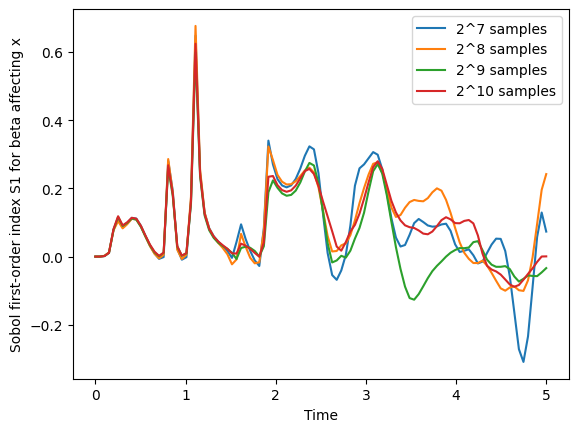

In [11]:
state_name = 'x'
param_name = 'beta'

fig, ax = plt.subplots()
for log2_num_samples, sobol_results in zip(log2_num_samples_list, all_sobol_results):
    ax.plot(dynamical_system.times, sobol_results['S1'].states[state_name].params[param_name], label=f'2^{log2_num_samples} samples')
ax.set_xlabel('Time')
ax.set_ylabel(f'Sobol first-order index S1 for {param_name} affecting {state_name}')
ax.legend()

In [ ]:
# Unflatten a (100, num_inputs) array of inputs into a dict with keys 'x', 'y', 'z'
from jax import tree, vmap
from functools import partial
# flatten_state = partial(ode_uq.flatten_dict, keys=dynamical_system.all_names)
# unflatten_random_params = partial(ode_uq.unflatten_array, relevant_keys=dynamical_system.random_param_names, all_keys=dynamical_system.all_param_names)
unflatten_random_inputs = partial(ode_uq.unflatten_array, relevant_keys=dynamical_system.random_input_names, all_keys=dynamical_system.all_names)
def construct_sim_results(arr):
    inputs = eqx.filter_vmap(unflatten_random_inputs)(arr)
    params  = {k: v for k, v in inputs.items() if k in dynamical_system.all_param_names}
    init_state = {k: v for k, v in inputs.items() if k in dynamical_system.all_state_names}
    return ode_uq.SimulationResults(
        params=params,
        init_state=init_state,
    )
# construct_sim_results()
# d = eqx.filter_vmap(flatten_state)(tree.map(lambda x: x[0], ss_res.states))

# d = {k: eqx.filter_vmap(unflatten_random_params)(v) for k, v in s1[0].items()}
eqx.tree_pprint(d)
# flatten_state(tree.map(lambda x: x[0,0], ss_res.states))

{
  'x': {'beta': None, 'rho': f32[100], 'sigma': f32[100]},
  'y': {'beta': None, 'rho': f32[100], 'sigma': f32[100]},
  'z': {'beta': None, 'rho': f32[100], 'sigma': f32[100]}
}


In [ ]:
# TODO: Get the sobol indices into the right format (SimulationResults for each type of index)
from SALib.analyze.sobol import analyze as sobol_analyze
problem = ode_uq.make_sobol_problem(dynamical_system)
sobol_analyze(problem, ss_res.functional_outputs['max_y'], print_to_console=True)